# Data Information                                                                                                                                                                                                          
business code - Product/service code provided by the company                                                                    
cust_number - Distinguishing teh customer based on the department                                                                
name_customer - name of the customer                                                                                                     
clear_date - Date the payment was done                                                                                                     
business_year - year which the business done                                                                                                     
doc_id - id of the document created                                                                                                      
posting_date - date of the posting transactions                                                                                                     
document_create_date = billing date/ date on the bill                                                                                                     
due_in_date - due data to pay the amount                                                                                                     
invoice_currency - currency in which the payment was made                                                                                                     
total_open_amount - Amount prepaid to the seller                                                                                                     
baseline_create_date - date till the payment terms will apply                                                                                                     
isOpen - If payment was done 1, else 0

# Ignore Warnings 

In [41]:
import warnings
warnings.filterwarnings('ignore')

# Importing Requirements

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Loading data

In [43]:
df_train = pd.read_csv("Data_Train.csv") # reaqding the training data
df_test = pd.read_csv("Data_Test.csv") # readaing the testing data

# Data Preprocessing 

Dat apreprocessing involves the action                                                                                                   
1. Data Cleaning: a. handling missing values b. handling noisy data 
2. Data Transformation: a. Normalisation b. Attribute Selection c. Discretisation 4. Hierarchy generation
3. Data Reduction: a. Dimensionality reduction

In [44]:
df_train.isnull().sum() #checking for null values in training data 

business_code            0
cust_number              0
name_customer            0
clear_date               0
buisness_year            0
doc_id                   0
posting_date             0
document_create_date     0
document_create_date1    0
due_in_date              0
invoice_currency         0
document type            0
posting_id               0
total_open_amount        0
baseline_create_date     0
cust_payment_terms       0
invoice_id               2
isOpen                   0
dtype: int64

# Droping rows with null values

In [45]:
df_train = df_train.dropna(how = 'any', axis =0) # removing null values from training data 

# Dropping Columns with Zero variance

In [46]:
'''
Removing the "document type" and "posting id" columns as the variance was zero they include very less amount of information
'''
df_train.drop('posting_id',axis='columns', inplace=True) # droping posting_id coloumn because of having null values 
df_train.drop('document type',axis='columns', inplace=True) # droping document type coloumn because of having null values
df_test.drop('posting_id',axis='columns', inplace=True) # droping posting_id coloumn because of having null values 
df_test.drop('document type',axis='columns', inplace=True) # droping document type coloumn because of having null values

In [47]:
df_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200704858,WAKE trust,03-01-2019,2019,1928550363,02-01-2019,20190102,20190102,20190117,USD,816.14,20190102,NAA8,1.928550e+09,0
1,U001,100031704,DELHAIZE associates,03-01-2019,2019,1928550569,02-01-2019,20190102,20190102,20190117,USD,673.99,20190102,NAA8,1.928551e+09,0
2,U013,140103480,PRIC foundation,04-01-2019,2019,1991819757,04-01-2019,20190104,20190104,20190218,USD,1898.40,20190104,NAVF,1.991820e+09,0
3,U001,200793830,M co,07-01-2019,2019,1928542559,30-12-2018,20181230,20181230,20190114,USD,35599.61,20181230,NAA8,1.928543e+09,0
4,U001,200705742,DOT in,08-01-2019,2019,1928570982,04-01-2019,20190104,20190104,20190124,USD,18436.57,20190104,NAD1,1.928571e+09,0


In [48]:
df_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,140104472,MARTIN us,NaN,2020,2960620642,13-03-2020,20200314,20200313,20200328,CAD,6238.08,20200318,CA10,2960620642,1
1,U001,200769623,WAL-MAR llc,NaN,2020,1930855784,05-05-2020,20200504,20200505,20200520,USD,49589.53,20200505,NAH4,1930855784,1
2,CA02,140104225,SAVE-ON- us,NaN,2020,2960623706,23-03-2020,20200323,20200323,20200403,CAD,119166.17,20200324,CA10,2960623706,1
3,U001,200762301,C&S WH corp,NaN,2020,1930772788,11-04-2020,20200410,20200411,20200426,USD,16164.55,20200411,NAC6,1930772788,1
4,U001,200769623,WAL-MAR in,NaN,2020,1930758671,08-04-2020,20200407,20200408,20200423,USD,35157.57,20200408,NAH4,1930758671,1


In [49]:
print(df_train.shape)
print(df_test.shape)

(39998, 16)
(9999, 16)


# Changing the Date Formats

In [50]:
import datetime as dt

In [51]:
#dividing the year, month,date from the number and changing the format

def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)

In [52]:
#changing the olumns t ointeger format to apply the function
df_train['due_in_date'] = pd.to_numeric(df_train['due_in_date'], downcast='integer') #changing the float type to integer
df_train['baseline_create_date'] = pd.to_numeric(df_train['baseline_create_date'], downcast='integer') #changing float to integer

In [53]:
# changin integer into yy-mm-dd frmat
df_train['due_in_date'] = df_train['due_in_date'].apply(date_format) #changing the integer to year-month-date format
df_train['baseline_create_date'] = df_train['baseline_create_date'].apply(date_format) #changing integer type to year-month-date form
df_train['document_create_date'] = df_train['document_create_date'].apply(date_format) #changing the integer to year-month-date form

In [54]:
#changing clear_date colum into date time format
df_train['clear_date']= pd.to_datetime(df_train['clear_date']) #changing object type to datetime format

In [55]:
# creating the target variable 
df_train['delay'] = (df_train['clear_date'] - df_train['due_in_date']).dt.days

In [56]:
#cre4ating expected delay feature
df_train['expected_delay'] = (df_train['due_in_date'] - df_train['baseline_create_date']).dt.days

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          39998 non-null  object        
 1   cust_number            39998 non-null  object        
 2   name_customer          39998 non-null  object        
 3   clear_date             39998 non-null  datetime64[ns]
 4   buisness_year          39998 non-null  int64         
 5   doc_id                 39998 non-null  int64         
 6   posting_date           39998 non-null  object        
 7   document_create_date   39998 non-null  datetime64[ns]
 8   document_create_date1  39998 non-null  int64         
 9   due_in_date            39998 non-null  datetime64[ns]
 10  invoice_currency       39998 non-null  object        
 11  total_open_amount      39998 non-null  float64       
 12  baseline_create_date   39998 non-null  datetime64[ns]
 13  c

# df_test date formats 

In [58]:
df_test['due_in_date'] = pd.to_numeric(df_test['due_in_date'], downcast='integer') #changing the float type to integer
df_test['baseline_create_date'] = pd.to_numeric(df_test['baseline_create_date'], downcast='integer') #changing float to integer

In [59]:
df_test['due_in_date'] = df_test['due_in_date'].apply(date_format) #changing the integer to year-month-date format
df_test['baseline_create_date'] = df_test['baseline_create_date'].apply(date_format) #changing integer type to year-month-date form
df_test['document_create_date'] = df_test['document_create_date'].apply(date_format) #changing the integer to year-month-date form

In [60]:
df_test['expected_delay'] = (df_test['due_in_date'] - df_test['baseline_create_date']).dt.days

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          9999 non-null   object        
 1   cust_number            9999 non-null   object        
 2   name_customer          9999 non-null   object        
 3   clear_date             0 non-null      float64       
 4   buisness_year          9999 non-null   int64         
 5   doc_id                 9999 non-null   int64         
 6   posting_date           9999 non-null   object        
 7   document_create_date   9999 non-null   datetime64[ns]
 8   document_create_date1  9999 non-null   int64         
 9   due_in_date            9999 non-null   datetime64[ns]
 10  invoice_currency       9999 non-null   object        
 11  total_open_amount      9999 non-null   float64       
 12  baseline_create_date   9999 non-null   datetime64[ns]
 13  cus

# EDA

In [62]:
import sweetviz as sv

In [108]:
report = sv.analyze(df_train)

                                             |                                             | [  0%]   00:00 ->…

In [109]:
report.show_html('EDA.html')

Report EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [110]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (50000, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    19 Predictors classified...
        This does not include the Target column(s)
        7 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


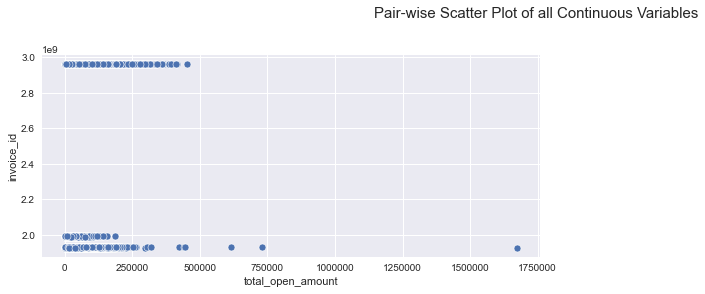

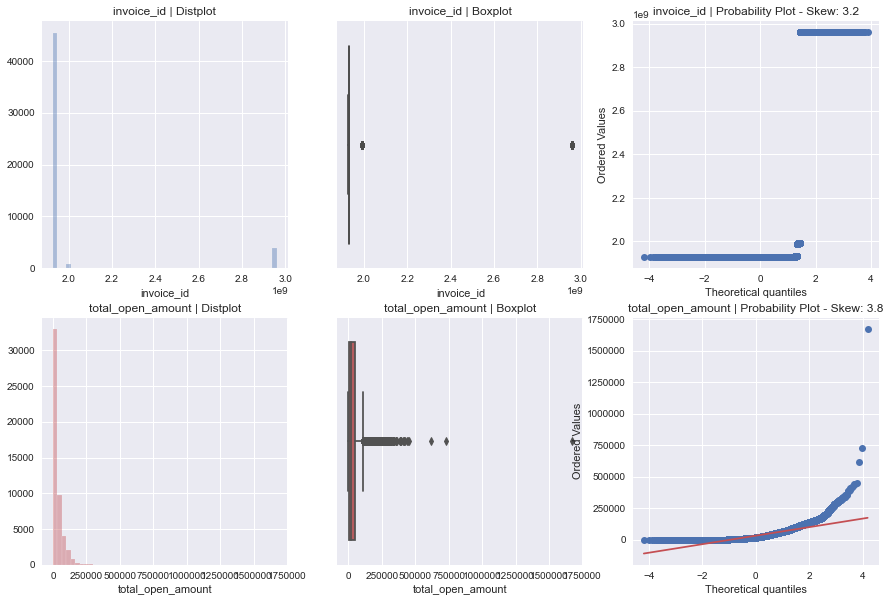

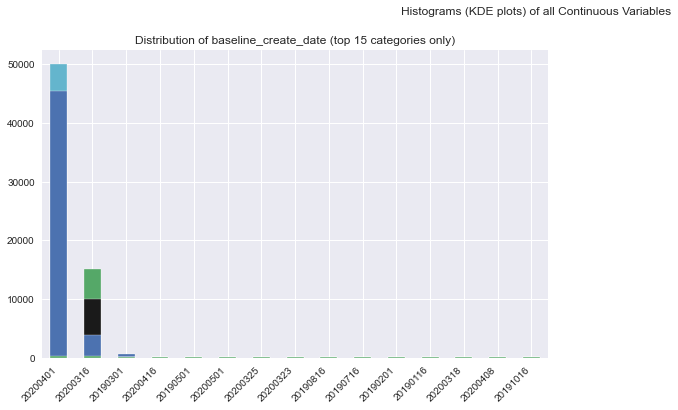

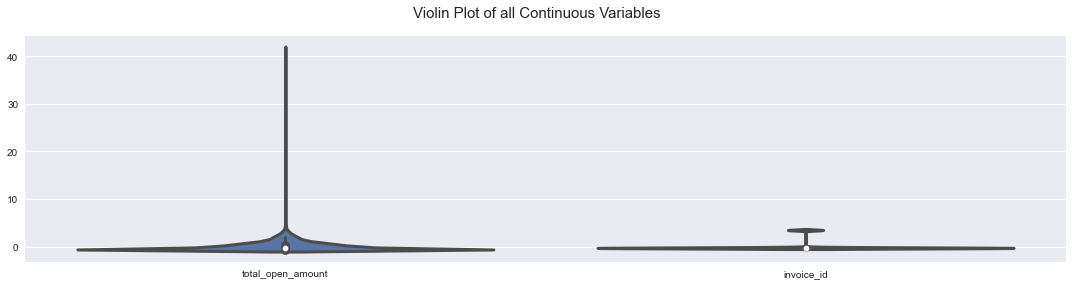

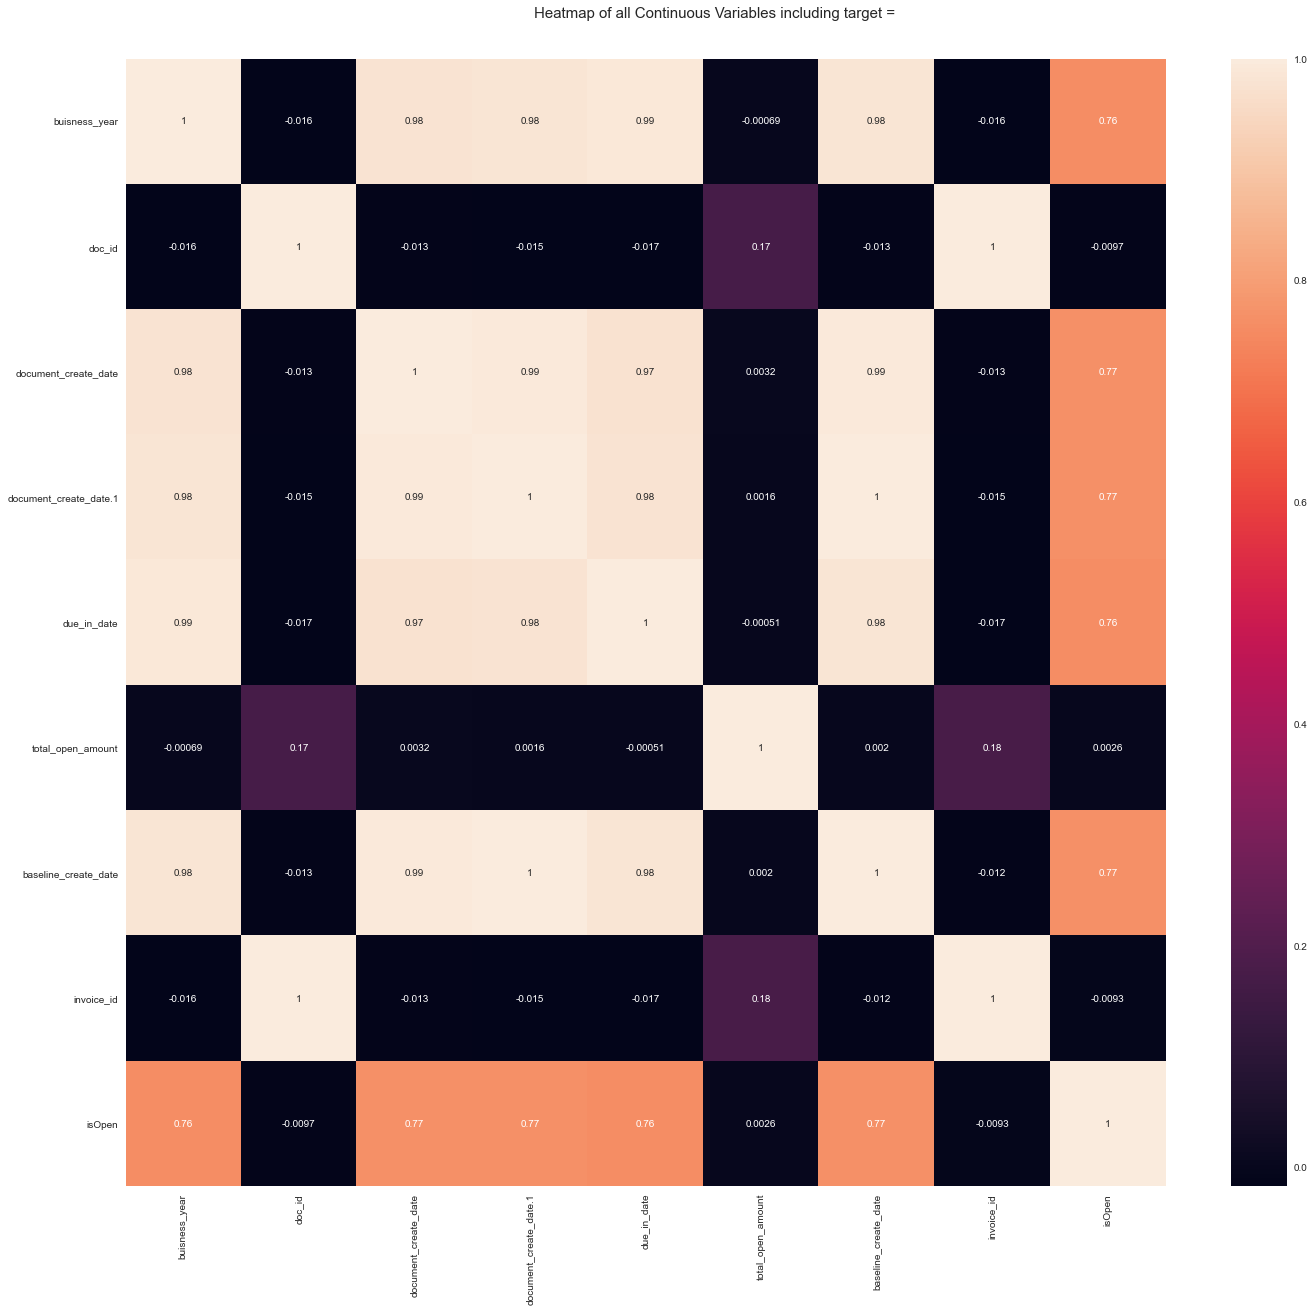

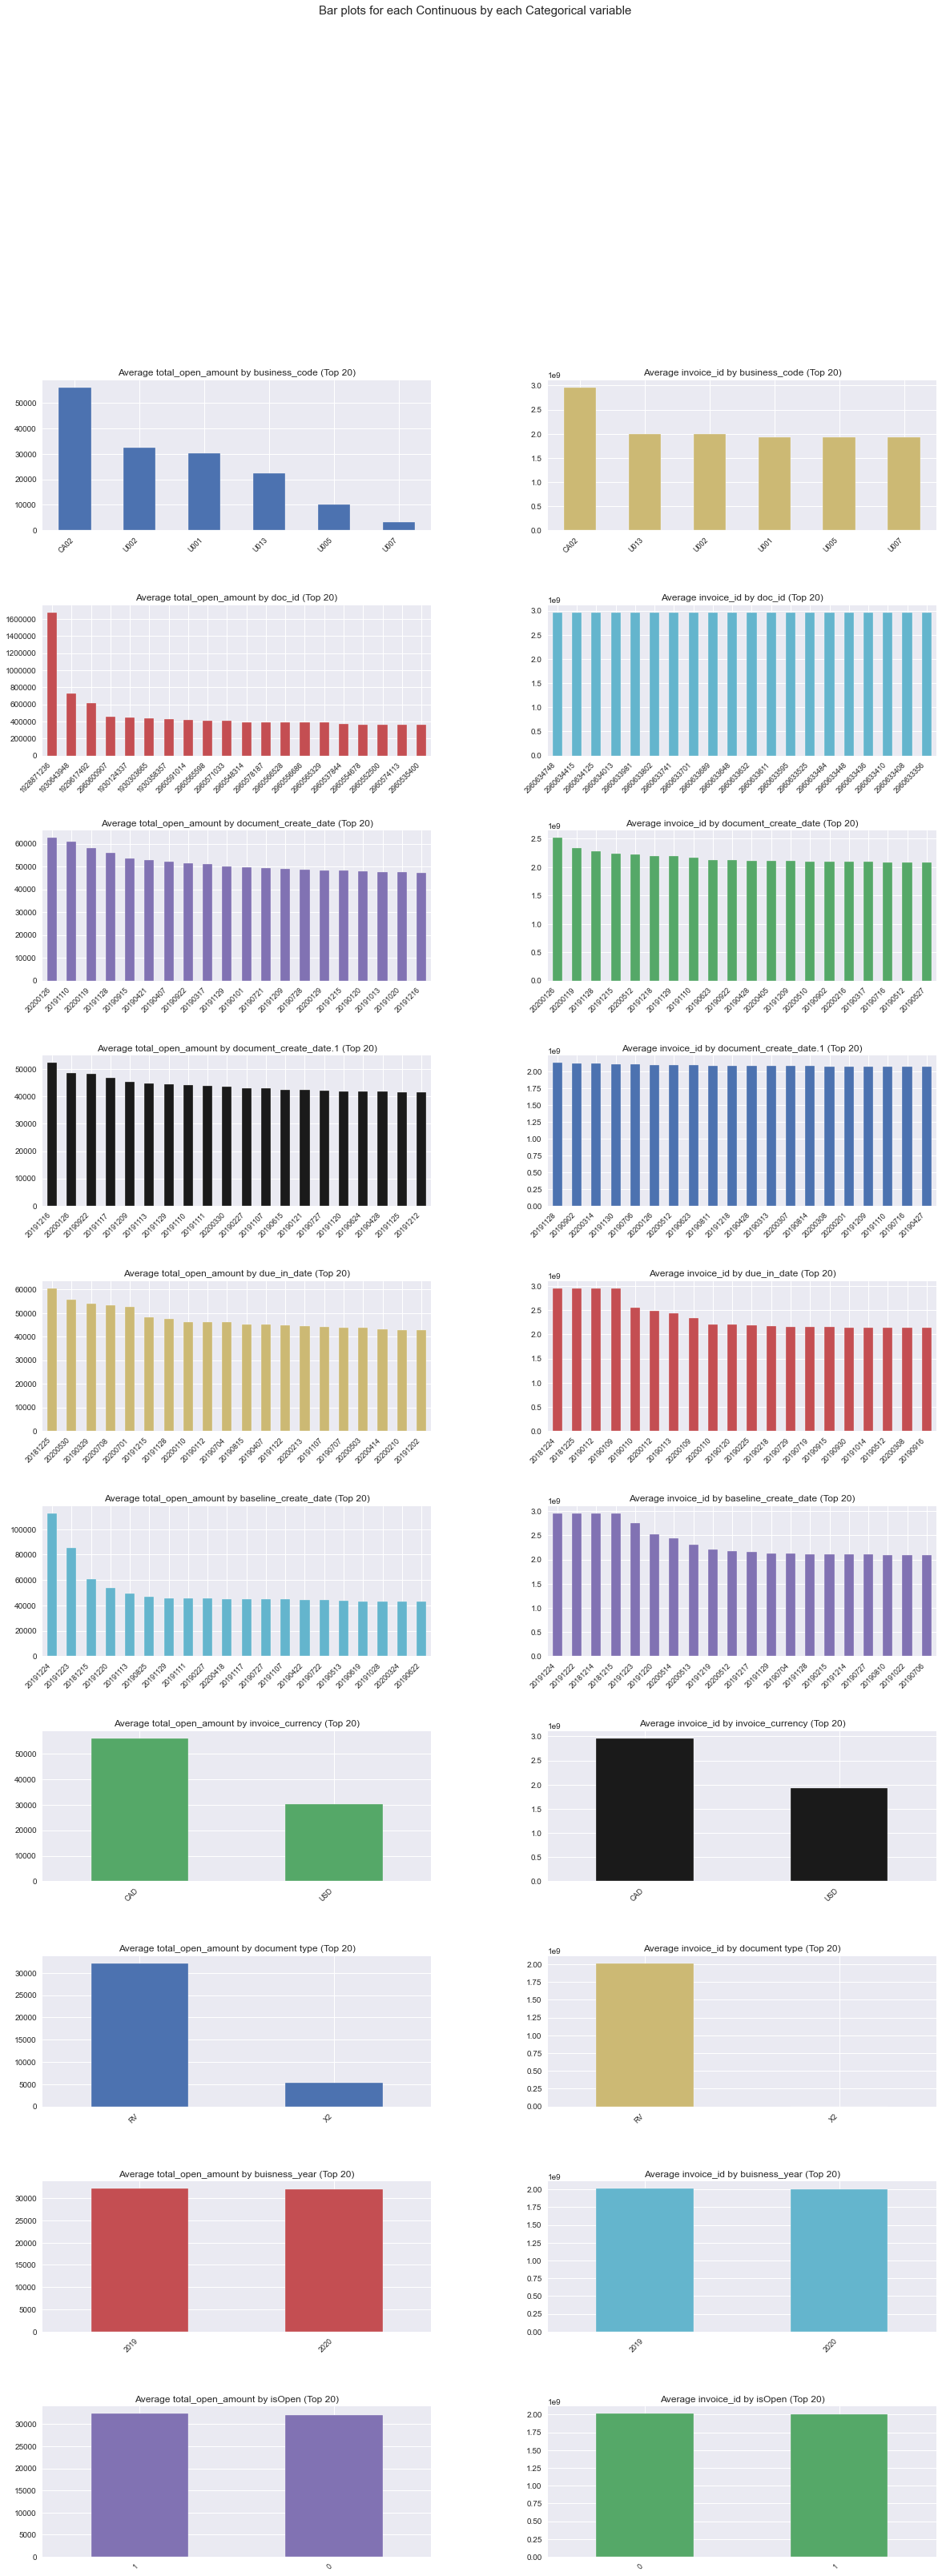

Time to run AutoViz (in seconds) = 16.647

 ###################### VISUALIZATION Completed ########################


In [111]:
dataviz = AV.AutoViz("H2HBABBA3114.csv")

# Feature Engineering

## 1.Encoding Currency column

In [63]:
#encoding currency column
invoice_curr = {'USD': 1, 'CAD': 0}
df_train['invoice_currency'] = df_train['invoice_currency'].map(invoice_curr)
df_test['invoice_currency'] = df_test['invoice_currency'].map(invoice_curr)

## 2.Encoding business_code column

In [64]:
buisness = pd.get_dummies(df_train['business_code'])
buisness1 = pd.get_dummies(df_test['business_code'])
df_train = pd.concat([df_train, buisness], axis=1)
df_test = pd.concat([df_test, buisness1], axis=1)

In [65]:
df_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,...,invoice_id,isOpen,delay,expected_delay,CA02,U001,U002,U005,U007,U013
0,U001,200704858,WAKE trust,2019-03-01,2019,1928550363,02-01-2019,2019-01-02,20190102,2019-01-17,...,1.928550e+09,0,43,15,0,1,0,0,0,0
1,U001,100031704,DELHAIZE associates,2019-03-01,2019,1928550569,02-01-2019,2019-01-02,20190102,2019-01-17,...,1.928551e+09,0,43,15,0,1,0,0,0,0
2,U013,140103480,PRIC foundation,2019-04-01,2019,1991819757,04-01-2019,2019-01-04,20190104,2019-02-18,...,1.991820e+09,0,42,45,0,0,0,0,0,1
3,U001,200793830,M co,2019-07-01,2019,1928542559,30-12-2018,2018-12-30,20181230,2019-01-14,...,1.928543e+09,0,168,15,0,1,0,0,0,0
4,U001,200705742,DOT in,2019-08-01,2019,1928570982,04-01-2019,2019-01-04,20190104,2019-01-24,...,1.928571e+09,0,189,20,0,1,0,0,0,0


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          39998 non-null  object        
 1   cust_number            39998 non-null  object        
 2   name_customer          39998 non-null  object        
 3   clear_date             39998 non-null  datetime64[ns]
 4   buisness_year          39998 non-null  int64         
 5   doc_id                 39998 non-null  int64         
 6   posting_date           39998 non-null  object        
 7   document_create_date   39998 non-null  datetime64[ns]
 8   document_create_date1  39998 non-null  int64         
 9   due_in_date            39998 non-null  datetime64[ns]
 10  invoice_currency       39998 non-null  int64         
 11  total_open_amount      39998 non-null  float64       
 12  baseline_create_date   39998 non-null  datetime64[ns]
 13  c

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          9999 non-null   object        
 1   cust_number            9999 non-null   object        
 2   name_customer          9999 non-null   object        
 3   clear_date             0 non-null      float64       
 4   buisness_year          9999 non-null   int64         
 5   doc_id                 9999 non-null   int64         
 6   posting_date           9999 non-null   object        
 7   document_create_date   9999 non-null   datetime64[ns]
 8   document_create_date1  9999 non-null   int64         
 9   due_in_date            9999 non-null   datetime64[ns]
 10  invoice_currency       9999 non-null   int64         
 11  total_open_amount      9999 non-null   float64       
 12  baseline_create_date   9999 non-null   datetime64[ns]
 13  cus

In [70]:
df_test['u007'] = 0

## 3.Dropping Categorical Columns

In [71]:
#droping the object columns 
df_train = df_train.drop(['business_code', 'cust_number', 'name_customer'], axis =1)

In [72]:
df_test = df_test.drop(['business_code', 'cust_number', 'name_customer'], axis =1)

## 4.Creating new features of year, month, day, week, day, quarter

In [73]:
#creating new columns in training data
df_train['year'] = df_train['document_create_date'].dt.year
df_train['month'] = df_train['document_create_date'].dt.month
df_train['day'] = df_train['document_create_date'].dt.day
df_train['week'] = df_train['document_create_date'].dt.week
df_train['which_day'] = df_train['document_create_date'].dt.dayofweek
df_train['quarter'] = df_train['document_create_date'].dt.quarter

In [74]:
#creating new columns in testing data
df_test['year'] = df_test['document_create_date'].dt.year
df_test['month'] = df_test['document_create_date'].dt.month
df_test['day'] = df_test['document_create_date'].dt.day
df_test['week'] = df_test['document_create_date'].dt.week
df_test['which_day'] = df_test['document_create_date'].dt.dayofweek
df_test['quarter'] = df_test['document_create_date'].dt.quarter

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   clear_date             39998 non-null  datetime64[ns]
 1   buisness_year          39998 non-null  int64         
 2   doc_id                 39998 non-null  int64         
 3   posting_date           39998 non-null  object        
 4   document_create_date   39998 non-null  datetime64[ns]
 5   document_create_date1  39998 non-null  int64         
 6   due_in_date            39998 non-null  datetime64[ns]
 7   invoice_currency       39998 non-null  int64         
 8   total_open_amount      39998 non-null  float64       
 9   baseline_create_date   39998 non-null  datetime64[ns]
 10  cust_payment_terms     39998 non-null  object        
 11  invoice_id             39998 non-null  float64       
 12  isOpen                 39998 non-null  int64         
 13  d

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   clear_date             0 non-null      float64       
 1   buisness_year          9999 non-null   int64         
 2   doc_id                 9999 non-null   int64         
 3   posting_date           9999 non-null   object        
 4   document_create_date   9999 non-null   datetime64[ns]
 5   document_create_date1  9999 non-null   int64         
 6   due_in_date            9999 non-null   datetime64[ns]
 7   invoice_currency       9999 non-null   int64         
 8   total_open_amount      9999 non-null   float64       
 9   baseline_create_date   9999 non-null   datetime64[ns]
 10  cust_payment_terms     9999 non-null   object        
 11  invoice_id             9999 non-null   int64         
 12  isOpen                 9999 non-null   int64         
 13  exp

### Using Deep Copy method to duplicate the data frame

In [77]:
df= df_train.copy()

## Dropping Date time columns

In [78]:
df = df.drop(['document_create_date','due_in_date','baseline_create_date','clear_date' ], axis =1)

In [79]:
df_test = df_test.drop(['document_create_date','due_in_date','baseline_create_date','clear_date' ], axis =1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          39998 non-null  int64  
 1   doc_id                 39998 non-null  int64  
 2   posting_date           39998 non-null  object 
 3   document_create_date1  39998 non-null  int64  
 4   invoice_currency       39998 non-null  int64  
 5   total_open_amount      39998 non-null  float64
 6   cust_payment_terms     39998 non-null  object 
 7   invoice_id             39998 non-null  float64
 8   isOpen                 39998 non-null  int64  
 9   delay                  39998 non-null  int64  
 10  expected_delay         39998 non-null  int64  
 11  CA02                   39998 non-null  uint8  
 12  U001                   39998 non-null  uint8  
 13  U002                   39998 non-null  uint8  
 14  U005                   39998 non-null  uint8  
 15  U0

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          9999 non-null   int64  
 1   doc_id                 9999 non-null   int64  
 2   posting_date           9999 non-null   object 
 3   document_create_date1  9999 non-null   int64  
 4   invoice_currency       9999 non-null   int64  
 5   total_open_amount      9999 non-null   float64
 6   cust_payment_terms     9999 non-null   object 
 7   invoice_id             9999 non-null   int64  
 8   isOpen                 9999 non-null   int64  
 9   expected_delay         9999 non-null   int64  
 10  CA02                   9999 non-null   uint8  
 11  U001                   9999 non-null   uint8  
 12  U002                   9999 non-null   uint8  
 13  U005                   9999 non-null   uint8  
 14  U013                   9999 non-null   uint8  
 15  u007

## 6. Encoding Customer payment term column

In [82]:
#encoding custpayment terms columns 
cust = pd.get_dummies(df['cust_payment_terms'])
cust1 = pd.get_dummies(df_test['cust_payment_terms'])
df = pd.concat([df, cust], axis=1)
df_test = pd.concat([df_test, cust], axis=1)

In [83]:
df= df.drop(['cust_payment_terms'],axis=1)
df_test= df_test.drop(['cust_payment_terms'],axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 93 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          39998 non-null  int64  
 1   doc_id                 39998 non-null  int64  
 2   posting_date           39998 non-null  object 
 3   document_create_date1  39998 non-null  int64  
 4   invoice_currency       39998 non-null  int64  
 5   total_open_amount      39998 non-null  float64
 6   invoice_id             39998 non-null  float64
 7   isOpen                 39998 non-null  int64  
 8   delay                  39998 non-null  int64  
 9   expected_delay         39998 non-null  int64  
 10  CA02                   39998 non-null  uint8  
 11  U001                   39998 non-null  uint8  
 12  U002                   39998 non-null  uint8  
 13  U005                   39998 non-null  uint8  
 14  U007                   39998 non-null  uint8  
 15  U0

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 39999
Data columns (total 92 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          9999 non-null   float64
 1   doc_id                 9999 non-null   float64
 2   posting_date           9999 non-null   object 
 3   document_create_date1  9999 non-null   float64
 4   invoice_currency       9999 non-null   float64
 5   total_open_amount      9999 non-null   float64
 6   invoice_id             9999 non-null   float64
 7   isOpen                 9999 non-null   float64
 8   expected_delay         9999 non-null   float64
 9   CA02                   9999 non-null   float64
 10  U001                   9999 non-null   float64
 11  U002                   9999 non-null   float64
 12  U005                   9999 non-null   float64
 13  U013                   9999 non-null   float64
 14  u007                   9999 non-null   float64
 15  ye

In [92]:
df = df.drop(['posting_date'], axis=1)
df_test = df_test.drop(['posting_date'], axis=1)

# Train Test Split

In [93]:
x_train = df[df['year'] < 2020].copy() #using Deep copy technique 
x_test = df[df['year'] == 2020].copy() #using deep copy technique

In [94]:
print(x_train.shape)
print(x_test.shape)

(35165, 92)
(4833, 92)


In [95]:
y_train = x_train['delay']
X_train = x_train.drop(['delay'], axis = 1)

In [96]:
y_test = x_test['delay']
X_test = x_test.drop(['delay'], axis = 1)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35165, 91)
(4833, 91)
(35165,)
(4833,)


# Feature Selection

## 1.SelectKBest Method

In [98]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

                Specs         Score
5          invoice_id  2.062981e+11
1              doc_id  2.062981e+11
4   total_open_amount  7.597972e+07
17               week  5.080340e+04
16                day  3.711042e+04
..                ...           ...
65               NATK  1.451853e+01
64               NATJ  1.194258e+01
78               NAVC  6.507472e+00
14               year  1.607389e-02
0       buisness_year  8.969960e-03

[84 rows x 2 columns]


In [99]:
pd.options.display.max_rows

60

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
print(featureScores.nlargest(100,'Score'))  #print 10 best features

                    Specs         Score
5              invoice_id  2.062981e+11
1                  doc_id  2.062981e+11
4       total_open_amount  7.597972e+07
17                   week  5.080340e+04
16                    day  3.711042e+04
7          expected_delay  3.366972e+04
63                   NAM4  2.408354e+04
46                   NAAW  1.810873e+04
59                   NAH4  1.193155e+04
90                   NAX2  1.148398e+04
15                  month  1.142241e+04
21                   B030  8.790250e+03
44                   NA9X  8.338645e+03
33                   CAX2  7.459247e+03
38                   NA32  6.791424e+03
58                   NAGD  5.398739e+03
45                   NAA8  5.041824e+03
8                    CA02  4.876357e+03
29                   CA10  4.826022e+03
82                   NAVL  4.727937e+03
57                   NAG2  4.652257e+03
88                   NAWP  4.317422e+03
41                   NA3F  4.043697e+03
89                   NAWU  3.348132e+03


## 7. Standardizing the weights

In [102]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

# Regression ML Model

## 1. Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
reg1 = LinearRegression()

In [105]:
reg1.fit(X_train,y_train)

LinearRegression()

In [106]:
reg1.fit(X_train,y_train)

LinearRegression()

In [107]:
print('Coefficients: ', reg1.coef_)

Coefficients:  [ 1.33066599e+02  2.29739621e+05 -2.02733340e-03 -5.88392361e+03
 -9.05316601e-08 -2.29739621e+05  2.62242862e-03  5.34430261e+00
  5.88391642e+03 -1.50613338e+03 -6.91824255e+02 -1.52293985e+03
 -1.46299062e+03 -7.00027799e+02 -1.02141005e+02 -1.10169863e+01
  2.20267763e-01  1.00372010e+00  2.18779364e-01 -4.76492437e+00
  9.67743784e-06  1.22451414e+02 -7.22782636e+01  9.80681344e-06
 -2.02998201e+01 -8.11878433e+01 -7.52588098e+01  1.24509783e+02
 -1.74579269e+01  1.26157395e+02  1.62927635e+01 -1.06227941e+02
  2.16194183e+02  9.52267263e+01  1.20584137e+02 -2.02600226e+02
  6.72208671e+00 -2.53759912e+02 -7.49317826e-01 -3.56827809e+00
  4.70946420e+00  1.21071044e+02  9.70795509e+01 -4.97656040e+01
  7.39202394e+01  9.51288826e+01 -2.99595695e+01  9.09590209e+01
  2.20086136e+02 -1.80171586e+02 -9.61496770e+01  9.11114239e+01
 -1.50805694e+02 -1.14681052e-06  6.88550599e+01 -6.90896519e+01
  1.34045532e+01 -4.89381617e+01 -2.05412123e+02  9.55963299e+01
  1.877310

In [108]:
y_pred1 = reg1.predict(X_test)

In [109]:
accuracy1 = round(reg1.score(X_train, y_train)*100,2)
print(round(accuracy1, 2), '%')

17.53 %


In [110]:
accuracy1 = round(reg1.score(X_test, y_test)*100,2)
print(round(accuracy1, 2), '%')

-2.31 %


In [111]:
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(y_test, y_pred1)
MSE1

8016.880849846424

## 2. Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

In [113]:
reg2 = Lasso(alpha=0.1)

In [114]:
reg2.fit(X_train,y_train)

Lasso(alpha=0.1)

In [115]:
y_pred2 = reg2.predict(X_test)

In [117]:
print('Coefficients: ', reg2.coef_)

Coefficients:  [ 1.05132134e+02 -5.31926138e-09 -5.71153890e-03  0.00000000e+00
 -1.35549119e-06  1.87353606e-11  0.00000000e+00 -5.02219442e-01
 -0.00000000e+00 -8.70513260e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.77956853e+01 -8.82786335e+00
  3.14871538e-01  1.74205213e-01  2.73764017e-01 -4.25834606e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.94640703e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.86329627e+01 -6.67988553e-01  3.75688284e-01
  2.550372

In [118]:
accuracy2 = round(reg2.score(X_train, y_train)*100,2)
print(round(accuracy2, 2), '%')

17.12 %


In [119]:
accuracy2 = round(reg2.score(X_test, y_test)*100,2)
print(round(accuracy2, 2), '%')

-3.73 %


In [120]:
from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(y_test, y_pred2)
MSE2

8127.798184565825

## 3. Ridge Regression

In [121]:
from sklearn.linear_model import Ridge

In [122]:
reg3 = Ridge(alpha=1.0)

In [123]:
reg3.fit(X_train, y_train)

Ridge()

In [124]:
y_pred3 = reg3.predict(X_test)

In [125]:
accuracy3 = round(reg3.score(X_train, y_train)*100,2)
print(round(accuracy3, 2), '%')

17.48 %


In [126]:
accuracy3 = round(reg3.score(X_test, y_test)*100,2)
print(round(accuracy3, 2), '%')

1.23 %


In [127]:
from sklearn.metrics import mean_squared_error
MSE3 = mean_squared_error(y_test, y_pred3)
MSE3

7739.4407403224295

## 4. Elastic Net with Hyper parameter optimisation with Grid Search CV

In [128]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

In [129]:
reg4=ElasticNet(normalize=True)
search=GridSearchCV(estimator=reg4,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [130]:
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.2}


6798.46500832662

In [131]:
elastic=ElasticNet(normalize=True,alpha=1e-5,l1_ratio=0.8)

In [132]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [133]:
y_pred4 = elastic.predict(X_test)

In [134]:
accuracy4 = round(elastic.score(X_train, y_train)*100,2)
print(round(accuracy4, 2), '%')

17.24 %


In [135]:
accuracy4 = round(elastic.score(X_test, y_test)*100,2)
print(round(accuracy4, 2), '%')

-14.1 %


In [136]:
from sklearn.metrics import mean_squared_error
MSE4 = mean_squared_error(y_test, y_pred4)
MSE4

8940.647043531362

## 5. Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor 

In [138]:
reg5 = DecisionTreeRegressor( ) 

In [139]:
reg5.fit(X_train, y_train)

DecisionTreeRegressor()

In [140]:
y_pred5 = reg5.predict(X_test)

In [141]:
accuracy5 = round(reg5.score(X_train, y_train)*100,2)
print(round(accuracy5, 2), '%')

100.0 %


In [142]:
accuracy5 = round(reg5.score(X_test, y_test)*100,2)
print(round(accuracy5, 2), '%')

-62.37 %


In [143]:
from sklearn.metrics import mean_squared_error
MSE5 = mean_squared_error(y_test, y_pred5)
MSE5

12723.20153114008

## 6. Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
reg6 = RandomForestRegressor(n_estimators=500, random_state = 42)

In [146]:
reg6.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [147]:
y_pred6 = reg6.predict(X_test)

In [148]:
accuracy6 = round(reg6.score(X_train, y_train)*100,2)
print(round(accuracy6, 2), '%')

93.9 %


In [149]:
accuracy6 = round(reg6.score(X_test, y_test)*100,2)
print(round(accuracy6, 2), '%')

-37.05 %


In [150]:
from sklearn.metrics import mean_squared_error
MSE6 = mean_squared_error(y_test, y_pred6)
MSE6

10738.794959216586

## Hyper parameter Oprimization

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 55, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 255, 311, 366, 422, 477, 533, 588, 644, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 19, 23, 28, 32, 37, 41, 46, 50, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [114]:
# First create the base model to tune
regressor = RandomForestRegressor() # Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.best_params_

In [ ]:
reg6 = RandomForestRegressor(n_estimators = 311, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto',
                                      max_depth = 23, bootstrap = True)

In [ ]:
reg6.fit(X_train, y_train)

In [ ]:
accuracy6 = round(reg6.score(X_train, y_train)*100,2)
print(round(accuracy6, 2), '%')

In [ ]:
accuracy6 = round(reg6.score(X_test, y_test)*100,2)
print(round(accuracy6, 2), '%')

# Predictions on Test Set

In [137]:
data = reg6.predict(X_test)
data

array([ 40.932, 190.976, 222.376, ...,  71.218,  64.316,  66.606])

# Converting Regression to Classification

In [145]:
def Prediction(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("Payment done before due date.")
        elif i<10:
            temp.append("Payment done before 10 days after due date")
        elif i < 15:
            temp.append("Payment done before 15 days after due date")
        elif i < 30:
            temp.append("Payment done before 30 days after due date")
        else:
            temp.append("Payment done much after due date.")
    return temp

func = Prediction(data)
bucket = pd.DataFrame()
bucket['Predictions'] = data
bucket['Bucket_list'] = func
bucket.head()

,Predictions,Bucket_list
0,40.932,Payment done much after due date.
1,190.976,Payment done much after due date.
2,222.376,Payment done much after due date.
3,222.376,Payment done much after due date.
4,222.376,Payment done much after due date.


In [146]:
bucket

,Predictions,Bucket_list
0,40.932,Payment done much after due date.
1,190.976,Payment done much after due date.
2,222.376,Payment done much after due date.
3,222.376,Payment done much after due date.
4,222.376,Payment done much after due date.
5,222.376,Payment done much after due date.
6,222.376,Payment done much after due date.
7,222.376,Payment done much after due date.
8,222.314,Payment done much after due date.
9,218.182,Payment done much after due date.


# Fun with other ALGO

## 7. KNN

In [147]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [149]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.36684925488631e-12
RMSE value for k=  2 is: 1.36684925488631e-12
RMSE value for k=  3 is: 1.36684925488631e-12
RMSE value for k=  4 is: 1.36684925488631e-12
RMSE value for k=  5 is: 1.36684925488631e-12
RMSE value for k=  6 is: 1.36684925488631e-12
RMSE value for k=  7 is: 1.36684925488631e-12
RMSE value for k=  8 is: 1.36684925488631e-12
RMSE value for k=  9 is: 1.36684925488631e-12
RMSE value for k=  10 is: 1.36684925488631e-12
RMSE value for k=  11 is: 1.36684925488631e-12
RMSE value for k=  12 is: 1.36684925488631e-12
RMSE value for k=  13 is: 1.36684925488631e-12
RMSE value for k=  14 is: 1.36684925488631e-12
RMSE value for k=  15 is: 1.36684925488631e-12
RMSE value for k=  16 is: 1.36684925488631e-12
RMSE value for k=  17 is: 1.36684925488631e-12
RMSE value for k=  18 is: 1.36684925488631e-12
RMSE value for k=  19 is: 1.36684925488631e-12
RMSE value for k=  20 is: 1.36684925488631e-12


In [150]:
accuracy7 = round(model.score(X_train, y_train)*100,2)
print(round(accuracy7, 2), '%')

99.65 %


In [151]:
accuracy7 = round(model.score(X_test, y_test)*100,2)
print(round(accuracy7, 2), '%')

92.32 %


## 8. Artificial Neural Network

In [152]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [154]:
n_features = X_train.shape[1]

In [163]:
n_features

95

In [164]:
model = Sequential()
model.add(Dense(120, input_dim=95, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(110, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(90, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(70, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(60, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [165]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 120)               11520     
_________________________________________________________________
dense_15 (Dense)             (None, 110)               13310     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               11100     
_________________________________________________________________
dense_17 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_18 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_19 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_20 (Dense)             (None, 60)                4260      
__________

In [166]:
model.compile(loss='mse', optimizer='adam',metrics=["accuracy"])

In [167]:
nn = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
 - 4s - loss: nan - acc: 0.0000e+00
Epoch 2/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 3/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 4/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 5/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 6/10
 - 4s - loss: nan - acc: 0.0000e+00
Epoch 7/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 8/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 9/10
 - 3s - loss: nan - acc: 0.0000e+00
Epoch 10/10
 - 3s - loss: nan - acc: 0.0000e+00


In [159]:
y_pred8 = model.predict(X_test)

In [161]:
y_pred8

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)